## Task-4. Критерии согласия

In [1]:
import helper as hp
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import math

In [2]:
my_var = 13
task_4 = '4'

### 4.1. Критерий хи-квадрат

In [4]:
df_1 = hp.get_data(task_4, hp.get_tasks_var(my_var))
data_1 = df_1.to_numpy()
df_1

,A8
0,382
1,508
2,415
3,498
4,350
...,...
1068,349
1069,439
1070,383
1071,315


Формула Стерджесса определения числа групп

In [276]:
k_bins=int(1 + math.log2(data_1.size))
k_bins

11

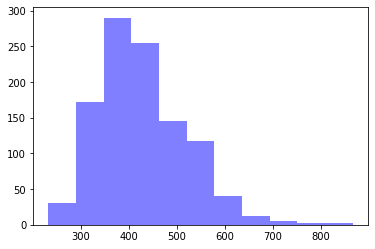

In [277]:
n, bins, patches = plt.hist(data_1, k_bins, density=False,  facecolor='blue', alpha=0.5)
plt.show()

In [278]:
np.diff(bins)[0] # Ширина интервала

57.636363636363626

In [279]:
n_prob = n / data_1.size # отн частота
n_prob

array([0.02795899, 0.16029823, 0.27027027, 0.23765144, 0.13513514,
       0.10997204, 0.03727866, 0.01211556, 0.0055918 , 0.00186393,
       0.00186393])

In [280]:
z = (bins - data_1.mean()) / data_1.std()
z

array([-2.16350425, -1.52740339, -0.89130253, -0.25520167,  0.3808992 ,
        1.01700006,  1.65310092,  2.28920178,  2.92530264,  3.5614035 ,
        4.19750436,  4.83360522])

In [281]:
def lapl_func(arg):
    F = stats.norm.cdf(arg) - 0.5
    F[0] = -0.5
    F[-1] = 0.5
    return F

In [282]:
p_theor = np.diff(lapl_func(z))
p_theor

array([6.33303672e-02, 1.23053079e-01, 2.12900226e-01, 2.49077303e-01,
       1.97062324e-01, 1.05421538e-01, 3.81213476e-02, 9.31320875e-03,
       1.53616805e-03, 1.70945218e-04, 1.34936230e-05])

In [287]:
pd.DataFrame({"Нижняя граница" : bins[:-1], 
              "Верхняя граница" : bins[1:],
              "Частота" : n,
              "Относит. частота" : n_prob,
              "Вероятность попадания в интервал при условии истинности основной гипотезы" : p_theor
             })


,Нижняя граница,Верхняя граница,Частота,Относит. частота,Вероятность попадания в интервал при условии истинности основной гипотезы
0,232.000000,289.636364,30.0,0.027959,0.063330
1,289.636364,347.272727,172.0,0.160298,0.123053
2,347.272727,404.909091,290.0,0.270270,0.212900
3,404.909091,462.545455,255.0,0.237651,0.249077
4,462.545455,520.181818,145.0,0.135135,0.197062
5,520.181818,577.818182,118.0,0.109972,0.105422
6,577.818182,635.454545,40.0,0.037279,0.038121
7,635.454545,693.090909,13.0,0.012116,0.009313
8,693.090909,750.727273,6.0,0.005592,0.001536
9,750.727273,808.363636,2.0,0.001864,0.000171


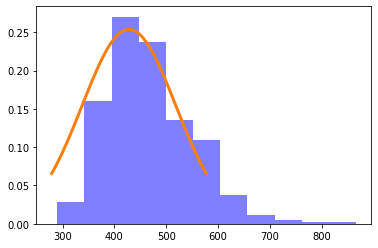

In [284]:
fig, ax = plt.subplots()
ax.hist(bins[1:], k_bins, weights = n_prob, density=False,  facecolor='blue', alpha=0.5)
x = np.linspace(stats.norm.ppf(0.05, data_1.mean(), data_1.std()), stats.norm.ppf(0.95, data_1.mean(), data_1.std()), 100)
ax.plot(x, stats.norm.pdf(x, data_1.mean(), data_1.std())*np.diff(bins)[0], lw=3, alpha=1)

In [379]:
pd.DataFrame(p_theor * data_1.size)

,0
0,67.953484
1,132.035954
2,228.441942
3,267.259946
4,211.447873
5,113.117310
6,40.904206
7,9.993073
8,1.648308
9,0.183424


In [388]:
def criterion_chi2_gof_test(data):
    sum = 0
    tmp_p = np.append(p_theor[:7], p_theor[7:-1].sum())
    tmp_n = np.append(n[:7], n[7:-1].sum())
    for i in range(tmp_p.size):
        sum += (tmp_p[i] * data.size - tmp_n[i])**2 / (tmp_p[i] * data.size)
    return sum

Объединим последние 4 интервала (чтобы p*n > 5)

In [389]:
display('crit', criterion_chi2_gof_test(data_1))

'crit'

78.67576959141245

In [399]:
display('p-value', 1 - stats.chi2.cdf(criterion_chi2_gof_test(data_1), k_bins - 2 - 1))

'p-value'

9.026113190202523e-14

### 4.2. Проверка гипотезы о нормальности на основе коэффициента асимметрии и эксцесса (критерий Харке-Бера)

In [5]:
crit, p_value = stats.jarque_bera(df_1)

In [6]:
display(crit, p_value)

162.56186413710836

0.0